# Heart Disease Prediction Using Machine Learning

# import modules for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics 


# loading data

In [2]:
df=pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Exploratory Data Analysis

In [4]:
df.shape

(319795, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
#we have many data which we need convert from object to number

# scalling the numeric data

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[["BMI","PhysicalHealth","MentalHealth","SleepTime"]]=sc.fit_transform(df[["BMI","PhysicalHealth","MentalHealth","SleepTime"]])

In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,55-59,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,80 or older,White,No,Yes,Very good,-0.067601,No,No,No
2,No,-0.274603,Yes,No,No,2.091388,3.281069,No,Male,65-69,White,Yes,Yes,Fair,0.628776,Yes,No,No
3,No,-0.647473,No,No,No,-0.424070,-0.490039,No,Female,75-79,White,No,No,Good,-0.763977,No,No,Yes
4,No,-0.726138,No,No,No,3.097572,-0.490039,Yes,Female,40-44,White,No,Yes,Very good,0.628776,No,No,No


In [9]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
#we dont have any null value, 

In [11]:
df.nunique()#checking each catagory containing how many unique value

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [12]:
#we are going to use 2 types of encoding for data variation labelencoder and ordinalencoder

# Checking Outliers in Dataset

<AxesSubplot:>

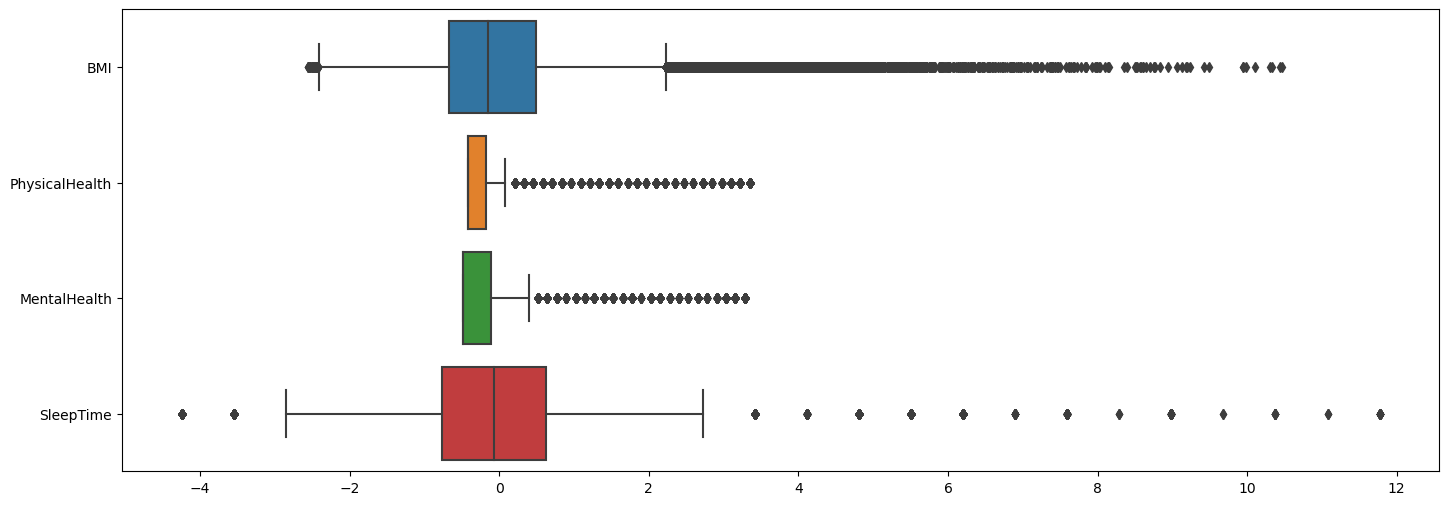

In [13]:
plt.figure(figsize=(17,6))
sns.boxplot(data=df, orient='h')

# handeling catagory data to numeric

In [14]:
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import OrdinalEncoder
enco=OrdinalEncoder()
df[["AgeCategory","Race","Diabetic","GenHealth"]]=enco.fit_transform(df[["AgeCategory","Race","Diabetic","GenHealth"]])

In [15]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,7.0,5.0,2.0,Yes,4.0,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,12.0,5.0,0.0,Yes,4.0,-0.067601,No,No,No
2,No,-0.274603,Yes,No,No,2.091388,3.281069,No,Male,9.0,5.0,2.0,Yes,1.0,0.628776,Yes,No,No
3,No,-0.647473,No,No,No,-0.424070,-0.490039,No,Female,11.0,5.0,0.0,No,2.0,-0.763977,No,No,Yes
4,No,-0.726138,No,No,No,3.097572,-0.490039,Yes,Female,4.0,5.0,0.0,Yes,4.0,0.628776,No,No,No


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    df[col]=le.fit_transform(df[col])    

In [18]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,7.0,5.0,2.0,1,4.0,-1.460354,1,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,12.0,5.0,0.0,1,4.0,-0.067601,0,0,0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,9.0,5.0,2.0,1,1.0,0.628776,1,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,11.0,5.0,0.0,0,2.0,-0.763977,0,0,1
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,4.0,5.0,0.0,1,4.0,0.628776,0,0,0


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDisease,319795.0,8.559546e-02,0.279766,0.000000,0.000000,0.000000,0.000000,1.000000
BMI,319795.0,-8.982963e-16,1.000002,-2.565319,-0.675793,-0.155032,0.486872,10.466277
Smoking,319795.0,4.124767e-01,0.492281,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholDrinking,319795.0,6.809675e-02,0.251912,0.000000,0.000000,0.000000,0.000000,1.000000
Stroke,319795.0,3.773980e-02,0.190567,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalHealth,319795.0,8.298850e-15,1.000002,-0.424070,-0.424070,-0.424070,-0.172524,3.349118
MentalHealth,319795.0,-7.510435e-15,1.000002,-0.490039,-0.490039,-0.490039,-0.112928,3.281069
DiffWalking,319795.0,1.388702e-01,0.345812,0.000000,0.000000,0.000000,0.000000,1.000000
Sex,319795.0,4.752732e-01,0.499389,0.000000,0.000000,0.000000,1.000000,1.000000
AgeCategory,319795.0,6.514536e+00,3.564759,0.000000,4.000000,7.000000,9.000000,12.000000


# Checking the corelation of data according to priority

In [20]:
print(df.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
PhysicalActivity    0.100030
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
AlcoholDrinking     0.032080
MentalHealth        0.028591
GenHealth           0.011062
SleepTime           0.008327
Name: HeartDisease, dtype: float64


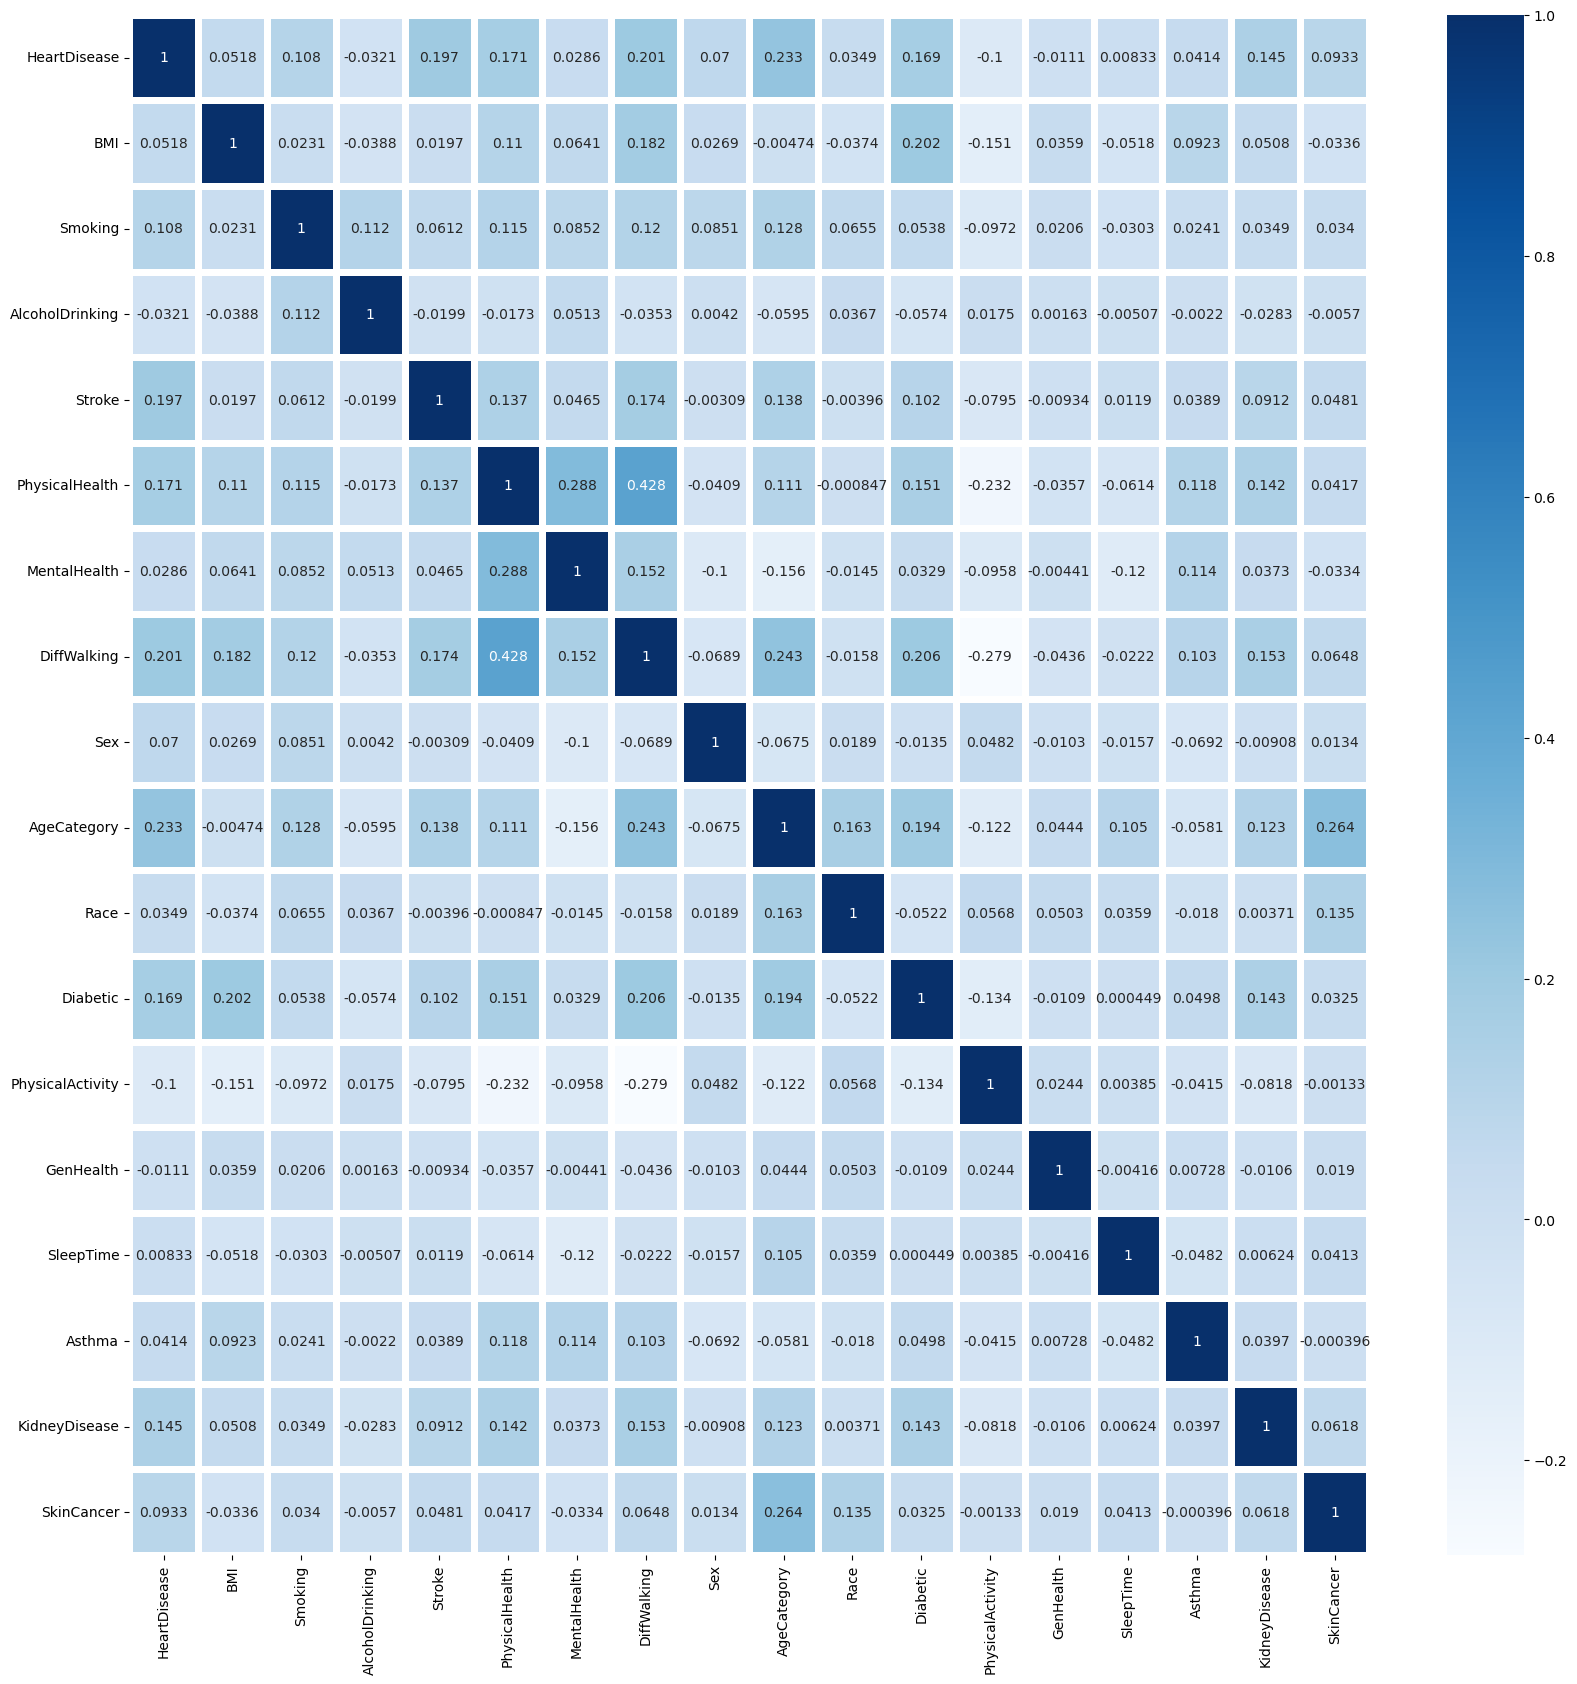

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt='.3g',linewidths=5, cmap='Blues')
plt.show()

# spliting data

In [22]:
x=df.drop('HeartDisease', axis=1)
y=df['HeartDisease']

In [23]:
x.shape

(319795, 17)

In [24]:
y.shape

(319795,)

In [25]:
y.value_counts(normalize=True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

In [26]:
#0=HeartDisease, 1=NoHeartDisease

<AxesSubplot:>

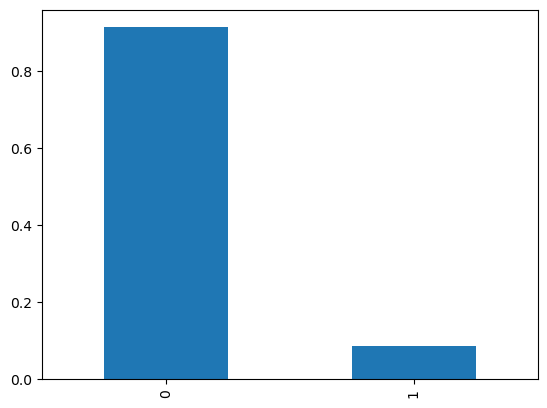

In [27]:
y.value_counts(normalize=True).plot(kind='bar')

In [28]:
#the Bar is showing that our Data is imbalance, 

# now we will try to handeling imbalance data

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7, random_state=42)

In [32]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((223856, 17), (95939, 17), (223856,), (95939,))

# SMOTETomek

In [33]:
from imblearn.combine import SMOTETomek

In [34]:
os=SMOTETomek(random_state=42)
xtrain_sm,ytrain_sm=os.fit_resample(xtrain,ytrain)
from collections import Counter
print('the number of classes before fit{}'.format(Counter(ytrain)))
print('the number of classes after fit{}'.format(Counter(ytrain_sm)))

the number of classes before fitCounter({0: 204773, 1: 19083})
the number of classes after fitCounter({0: 200960, 1: 200960})


In [35]:
xtrain_sm.shape,ytrain_sm.shape

((401920, 17), (401920,))

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(xtrain_sm,ytrain_sm)

RandomForestClassifier()

In [41]:
y_pred=classifier.predict(xtest)
print(confusion_matrix(ytest,y_pred))
print(accuracy_score(ytest, y_pred))
print(classification_report(ytest,y_pred))

[[80785  6864]
 [ 5964  2326]]
0.8662900384619393
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     87649
           1       0.25      0.28      0.27      8290

    accuracy                           0.87     95939
   macro avg       0.59      0.60      0.60     95939
weighted avg       0.87      0.87      0.87     95939



# Feature Selection

In [42]:
#now we will check which feature is more related with our target

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(xtrain_sm,ytrain_sm) 

SelectKBest()

In [44]:
score_col=pd.DataFrame(fit_feature.scores_,columns=['score value'])
name_col=pd.DataFrame(x.columns, columns=['Feature_Name'])
top_feature=pd.concat([name_col,score_col],axis=1)
top_feature.nlargest(17,'score value')

,Feature_Name,score value
8,AgeCategory,102758.644079
10,Diabetic,28606.795511
4,PhysicalHealth,25480.748741
6,DiffWalking,22005.303377
11,PhysicalActivity,20870.044767
2,AlcoholDrinking,9099.033851
1,Smoking,7831.469666
3,Stroke,6260.069137
0,BMI,3495.354098
15,KidneyDisease,2763.281790


# ExtraTreesClassifier

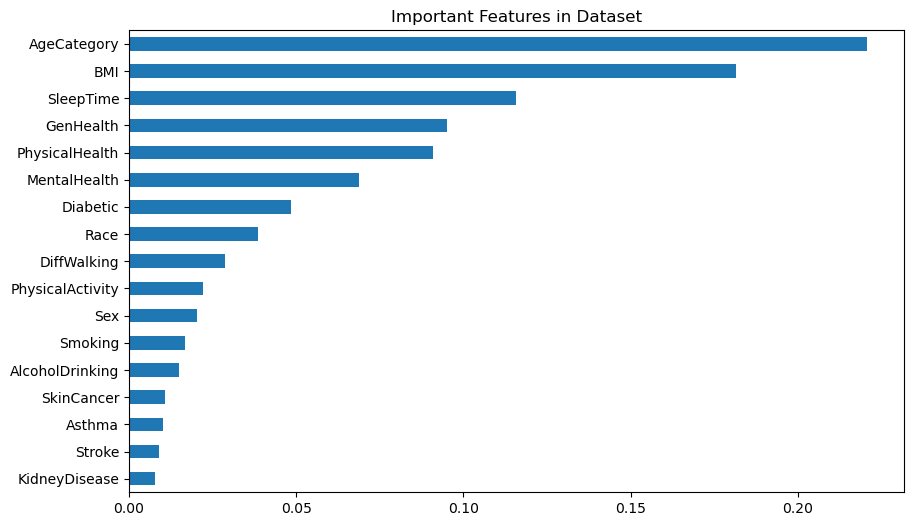

In [134]:
model = ExtraTreesClassifier()
model.fit(xtrain_sm,ytrain_sm)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,6))
feat_importances.nsmallest(30).plot(kind='barh')
round(feat_importances,4)*100
plt.title('Important Features in Dataset',size=12)
plt.show()

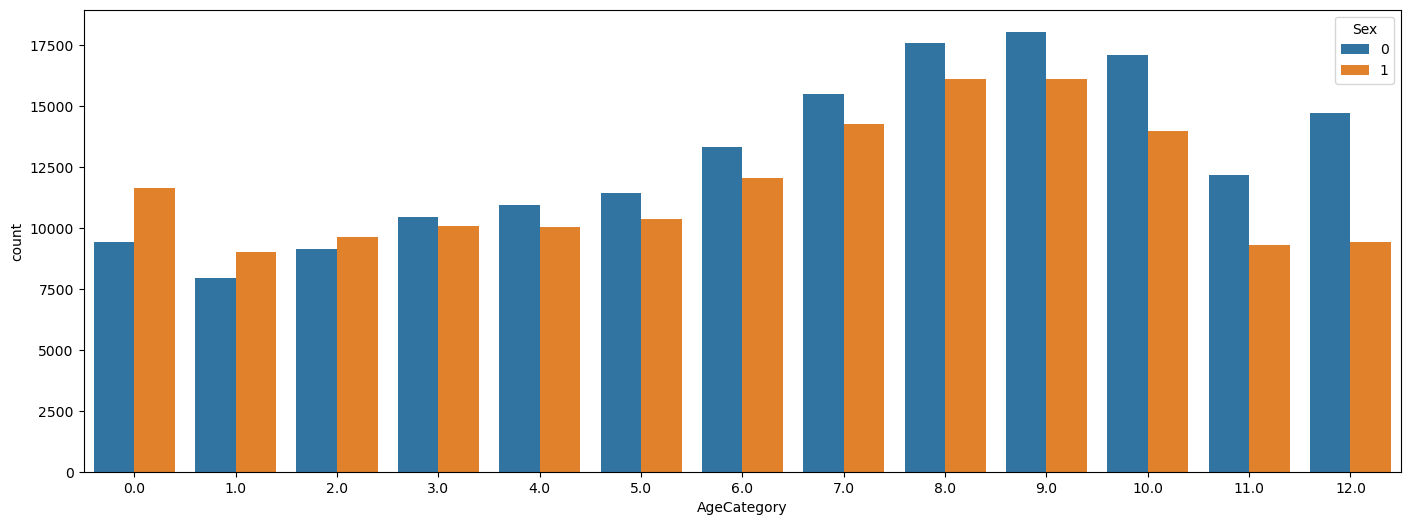

In [100]:
plt.figure(figsize=(17,6))
sns.countplot(x=df['AgeCategory'],hue=df['Sex'])
plt.show()

In [131]:
#Heart Disease Frequency for SleepTime

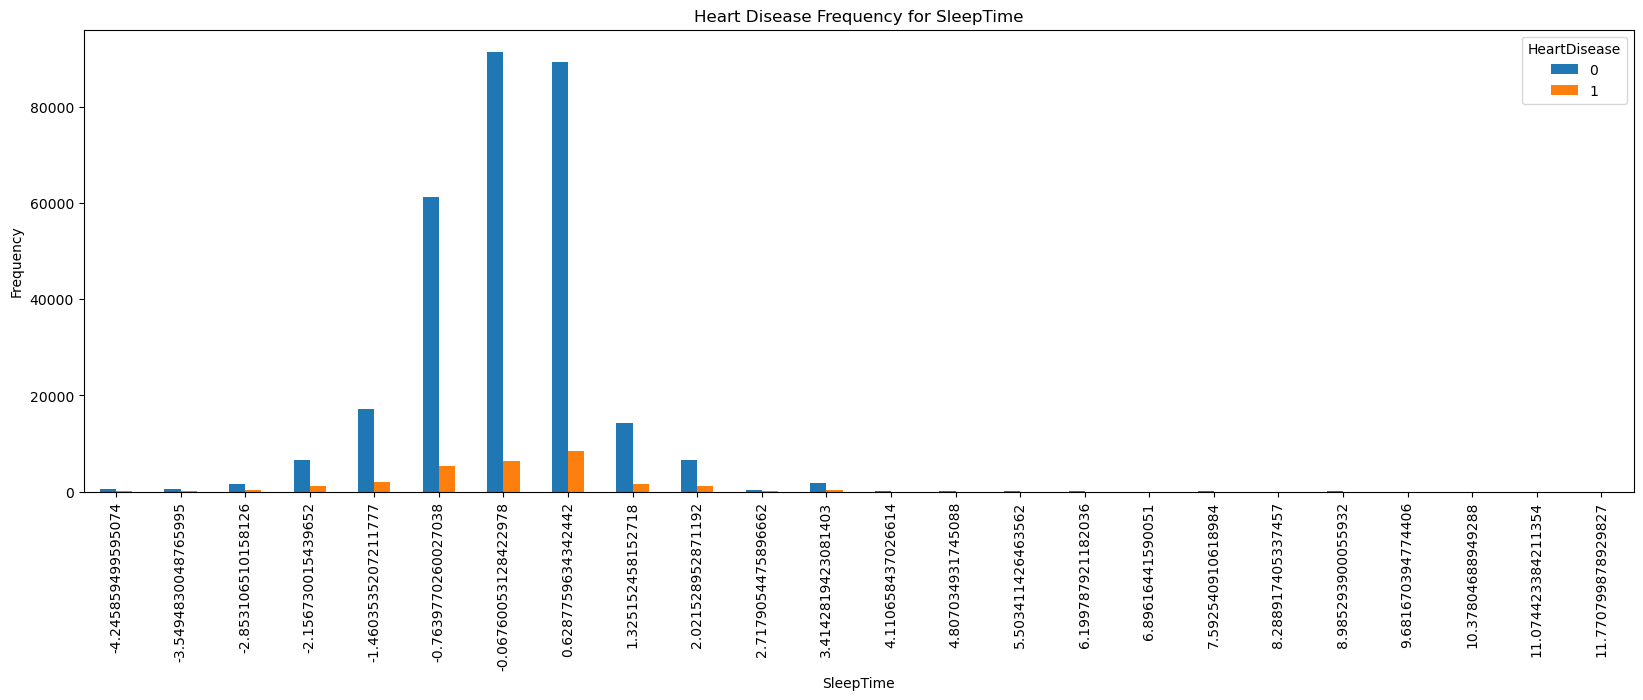

In [129]:
pd.crosstab(df.SleepTime,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for SleepTime')
plt.xlabel('SleepTime')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Heart Disease Frequency for AGE

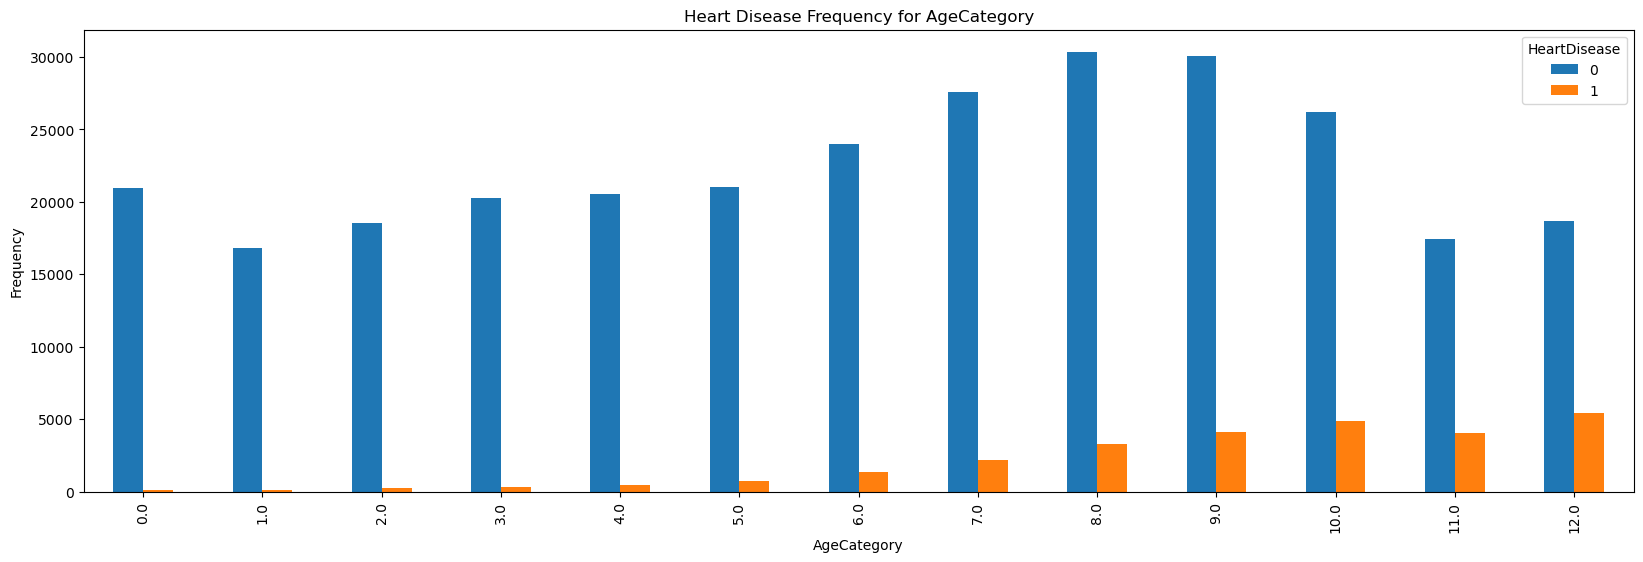

In [130]:
pd.crosstab(df.AgeCategory,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Heart Diesease Frequency for physicalHealth

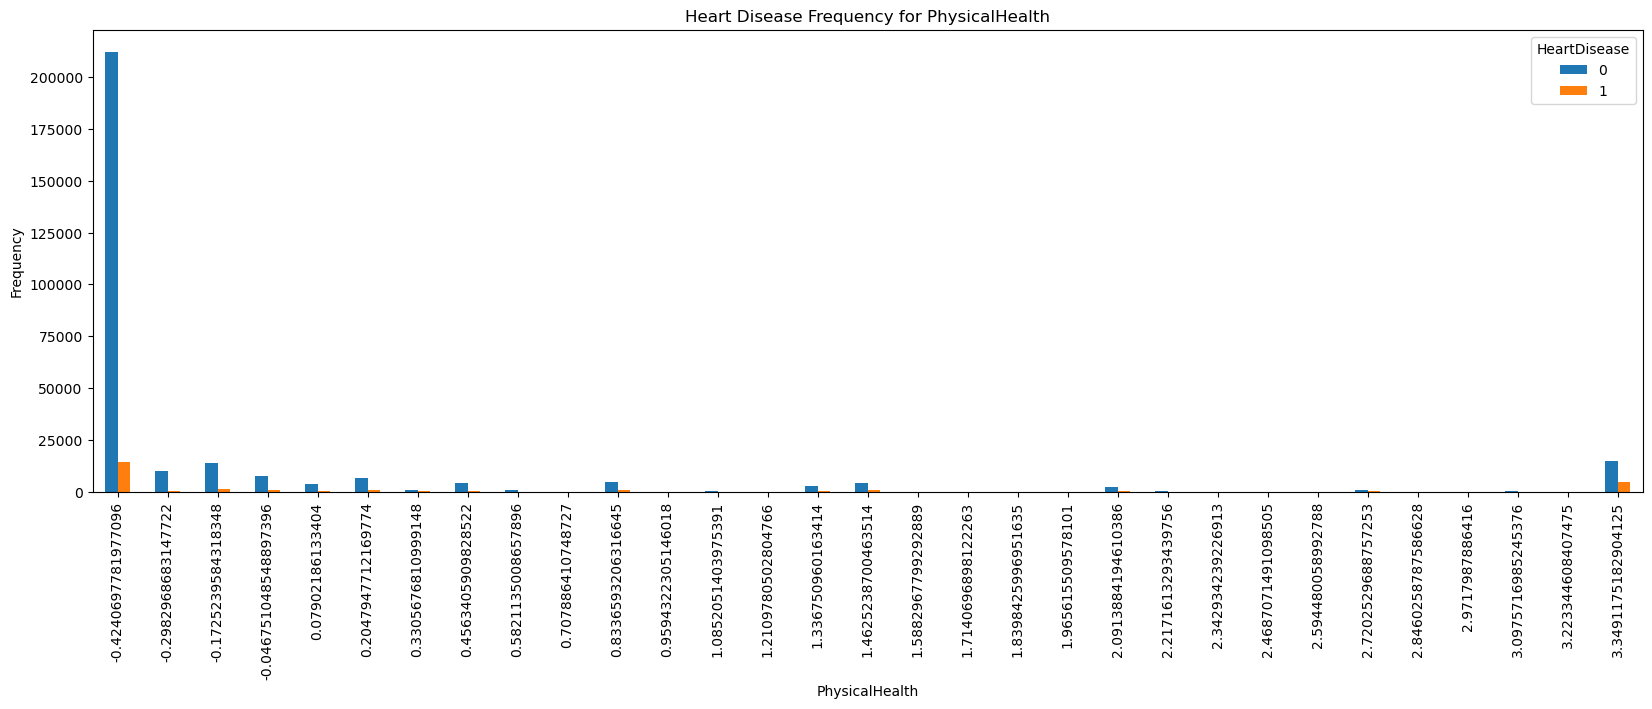

In [132]:
pd.crosstab(df.PhysicalHealth,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for PhysicalHealth')
plt.xlabel('PhysicalHealth')
plt.ylabel('Frequency')
plt.show()

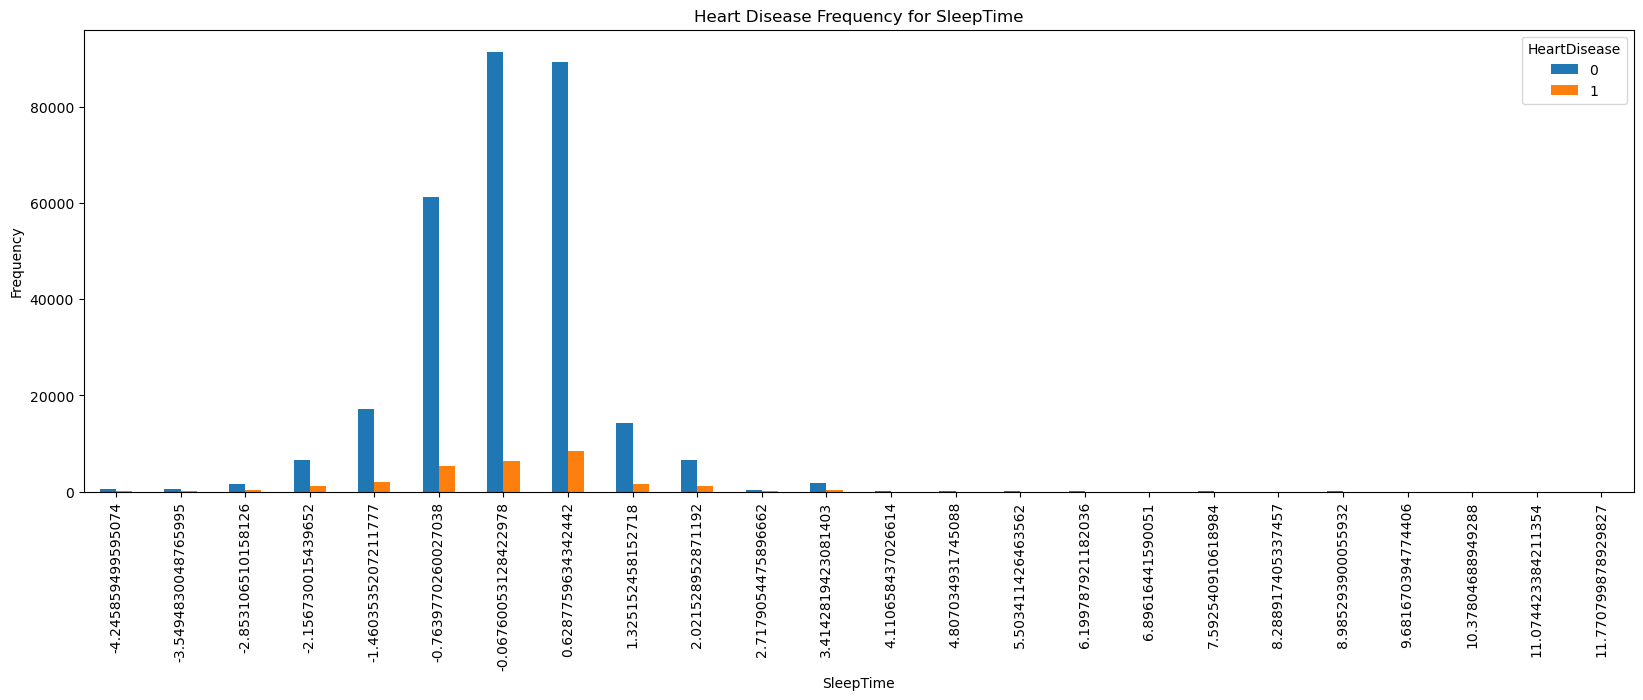

In [133]:
#Heart Diesease Frequency for SleepTime
pd.crosstab(df.SleepTime,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for SleepTime')
plt.xlabel('SleepTime')
plt.ylabel('Frequency')
plt.show()

# model building

In [45]:
MODEL = []
TEST = []
TRAIN = []
F1_SCORE = []
AUC = []
def result(model,test,train,f1,auc):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))
    F1_SCORE.append(round(f1,2))
    AUC.append(round(auc,2))

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(xtrain_sm,ytrain_sm)
lr_pred = lr.predict(xtest)
pd.DataFrame(np.c_[ytest,lr_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
95934,0,0
95935,0,0
95936,0,0
95937,0,1


Testing Accuracy : 70.6 %
Training Accuracy : 74.6 %
----------------------
Classification Report 
----------------------
              precision    recall  f1-score   support

           0       0.70      0.97      0.81     63312
           1       0.77      0.19      0.31     32627

    accuracy                           0.71     95939
   macro avg       0.73      0.58      0.56     95939
weighted avg       0.72      0.71      0.64     95939



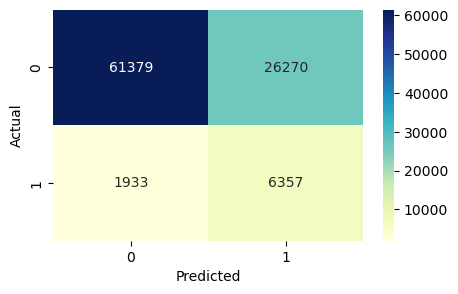

In [65]:
lr_train = lr.score(xtrain_sm,ytrain_sm)*100
lr_test = lr.score(xtest, ytest)*100
print('Testing Accuracy :',round(lr_test,2),"%")
print('Training Accuracy :',round(lr_train,2),"%")
print('----------------------')
print('Classification Report \n----------------------')
print(classification_report(lr_pred, ytest))
plt.figure(figsize=(5,3))
data = confusion_matrix(ytest, lr_pred)
lr_con = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
sns.heatmap(lr_con, annot=True, fmt='g',cmap="YlGnBu")
f1 = metrics.f1_score(lr_pred, ytest)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
auc = roc_auc_score(ytest,lr_pred)
lr_auc = round(auc*100,2)
lr_auc

73.36

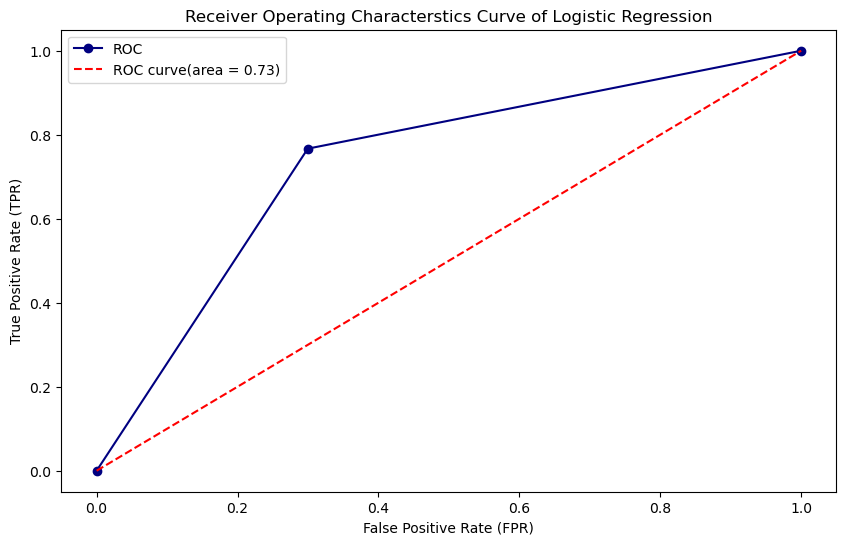

In [67]:
fpr, tpr, thresholds = roc_curve(ytest,lr_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics Curve of Logistic Regression')
plt.legend()
plt.show()

In [71]:
result('Logistic Regression', lr_test, lr_train, f1, lr_auc)

# DecisionTreeClassifier-optimizing decision tree(pre pruning)

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=6).fit(xtrain_sm,ytrain_sm)
dtc_pred=dtc.predict(xtest)
pd.DataFrame(np.c_[ytest,dtc_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
95934,0,0
95935,0,0
95936,0,0
95937,0,1


Testing Accuracy : 73.58 %
Training Accuracy : 77.17 %
----------------------
Classification Report 
----------------------
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     66948
           1       0.72      0.21      0.32     28991

    accuracy                           0.74     95939
   macro avg       0.73      0.59      0.58     95939
weighted avg       0.73      0.74      0.68     95939



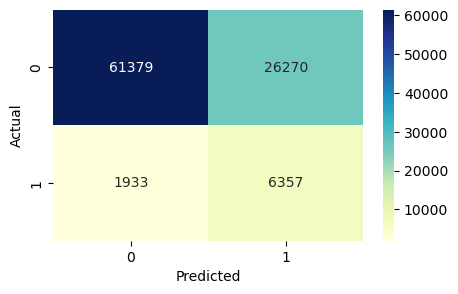

In [77]:
dtc_train = dtc.score(xtrain_sm,ytrain_sm)*100
dtc_test = dtc.score(xtest, ytest)*100
print('Testing Accuracy :',round(dtc_test,2),"%")
print('Training Accuracy :',round(dtc_train,2),"%")
print('----------------------')
print('Classification Report \n----------------------')
print(classification_report(dtc_pred, ytest))
plt.figure(figsize=(5,3))
data = confusion_matrix(ytest, dtc_pred)
dtc_con = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
sns.heatmap(lr_con, annot=True, fmt='g',cmap="YlGnBu")
f1 = metrics.f1_score(dtc_pred, ytest)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

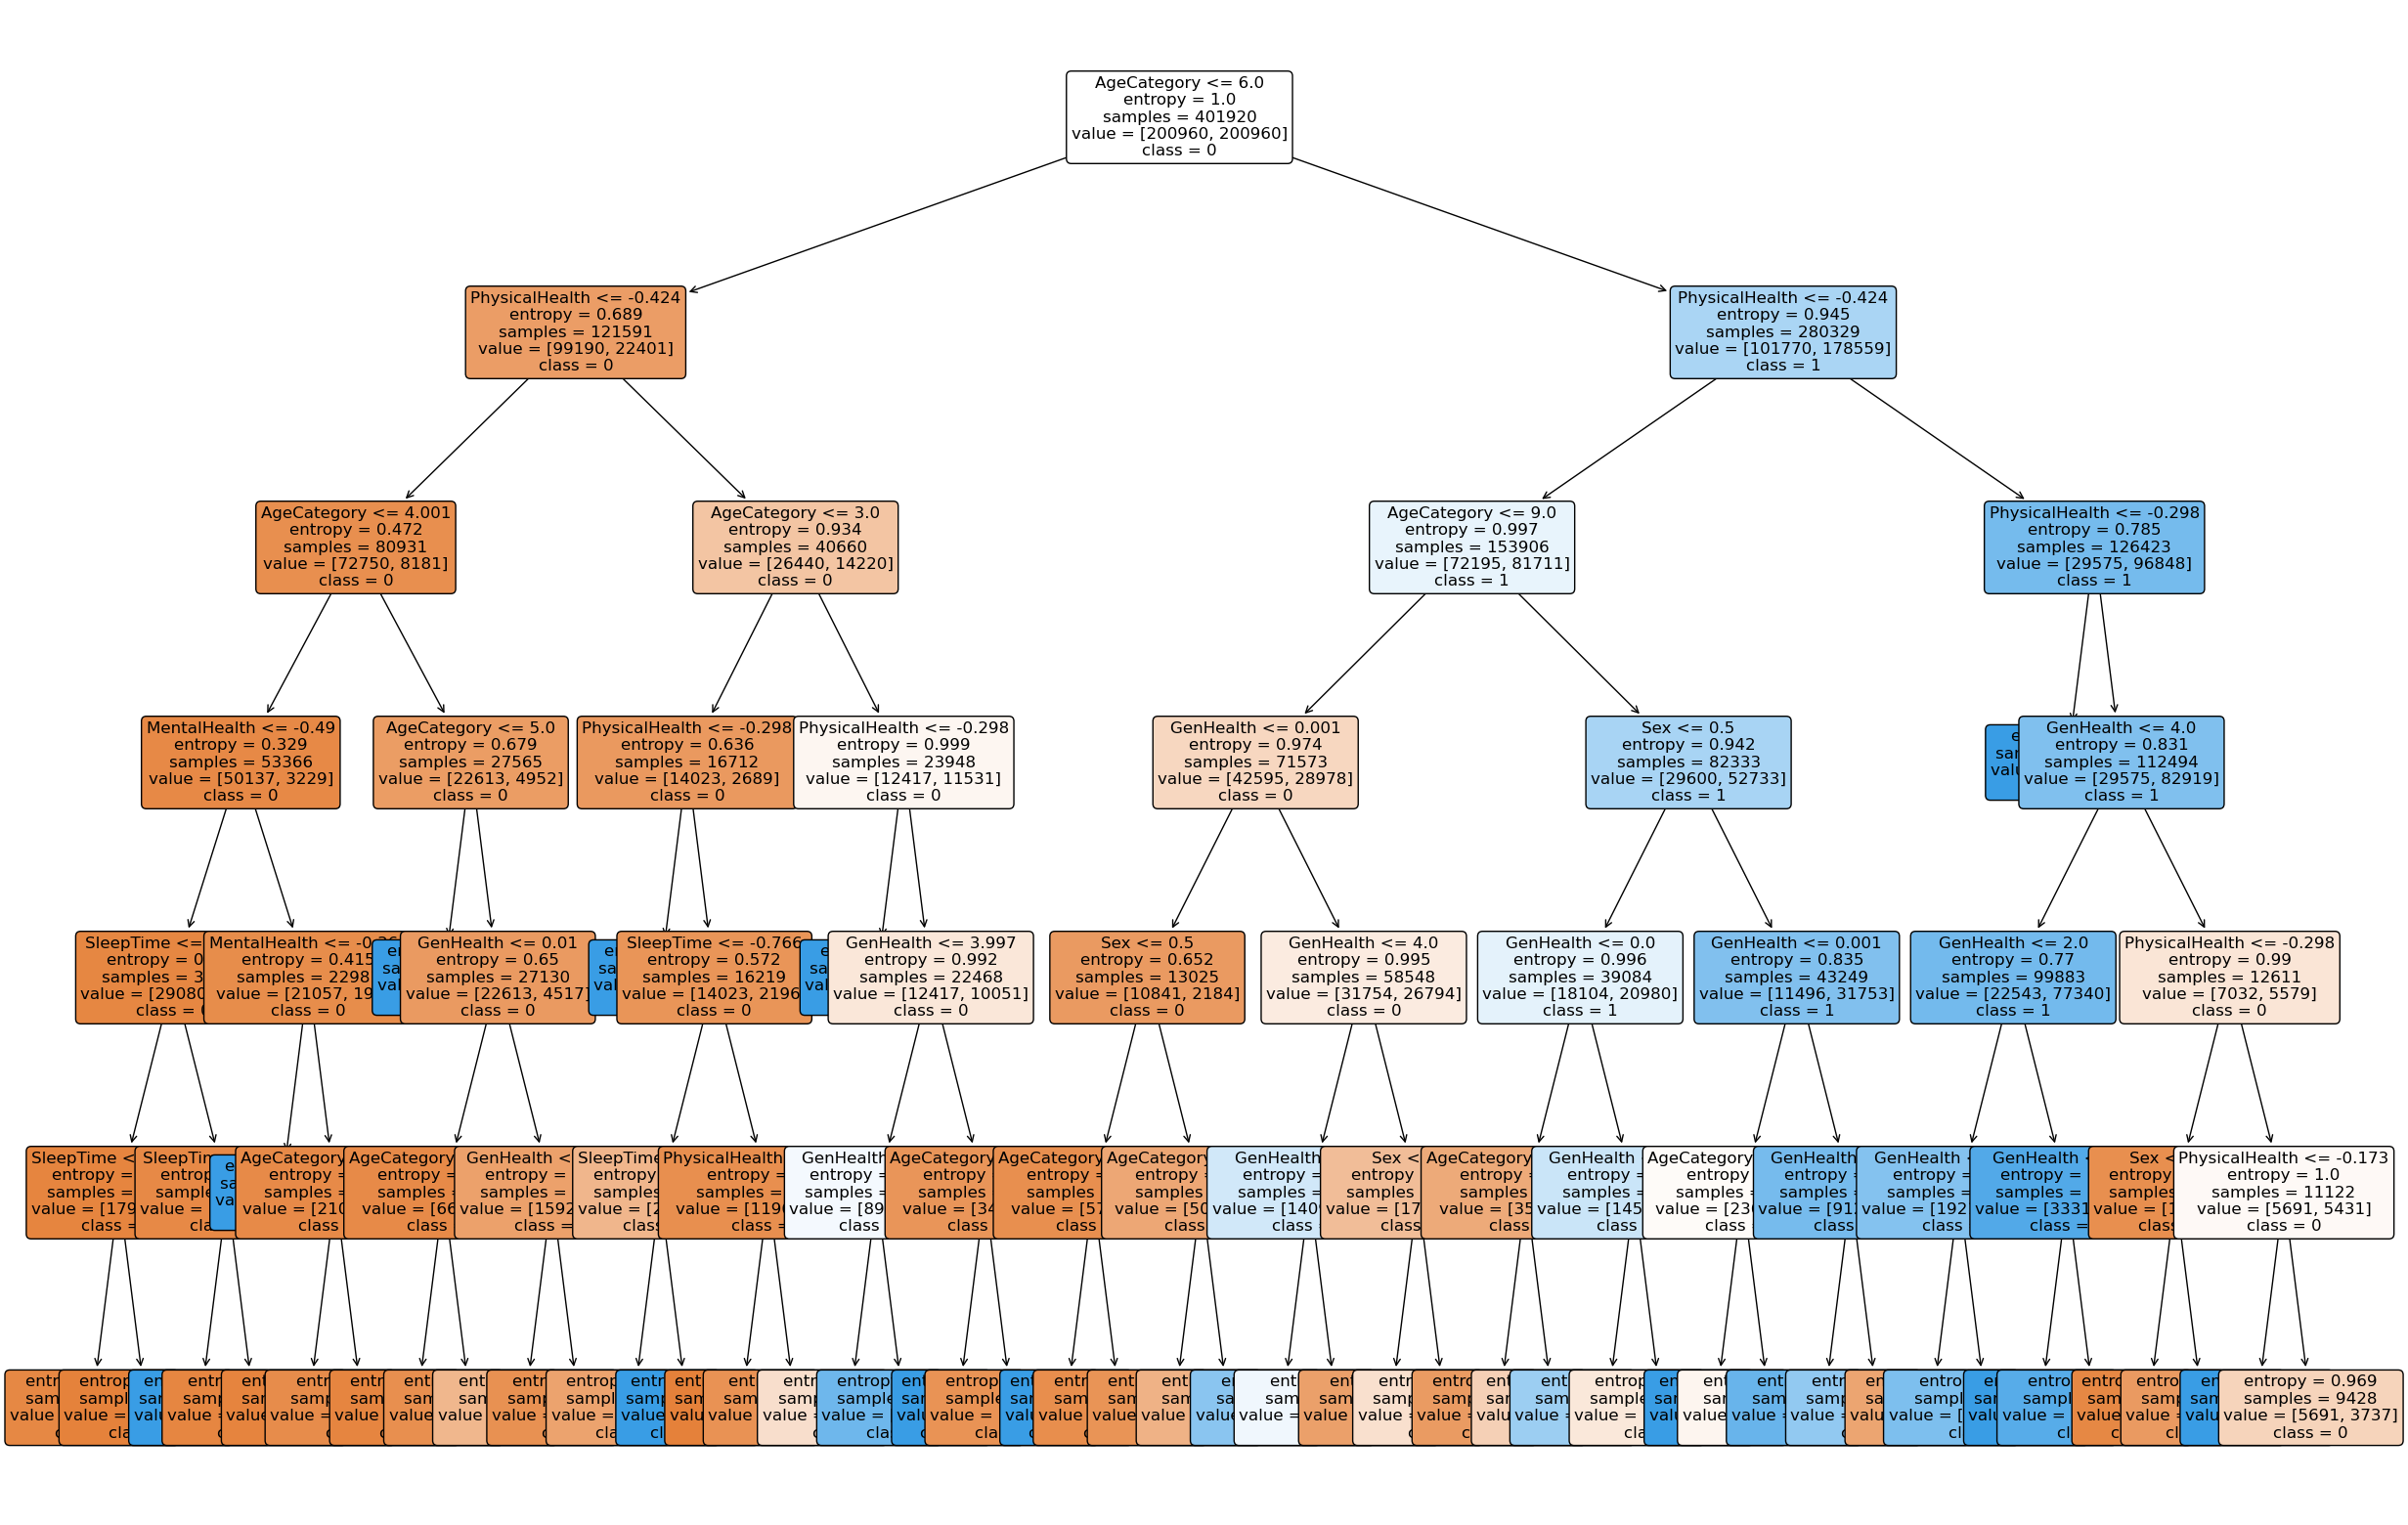

In [78]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtc, filled=True, rounded=True, feature_names=xtrain.columns, class_names=['0','1'],fontsize=12)
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
grid_param={"criterion":["gini","entropy",'log_loss'],
           "splitter":["best","random"],
           "max_depth":range(2,7,1),
           "max_features":['auto','sqrt','log2'],
           'ccp_alpha':[1,2,3,4,5,6,7],
           "min_samples_split":range(2,15,1)}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(xtrain_sm,ytrain_sm)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6),
             n_jobs=-1,
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 7),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']})

In [81]:
print(grid_search.best_params_)

{'ccp_alpha': 1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}


[Text(0.5, 0.8333333333333334, 'X[12] <= 0.0\ngini = 0.5\nsamples = 401920\nvalue = [200960, 200960]'),
 Text(0.25, 0.5, 'X[10] <= 0.001\ngini = 0.257\nsamples = 53443\nvalue = [45357, 8086]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.239\nsamples = 50303\nvalue = [43340, 6963]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.459\nsamples = 3140\nvalue = [2017, 1123]'),
 Text(0.75, 0.5, 'X[9] <= 4.0\ngini = 0.494\nsamples = 348477\nvalue = [155603, 192874]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.493\nsamples = 68463\nvalue = [38241, 30222]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.487\nsamples = 280014\nvalue = [117362, 162652]')]

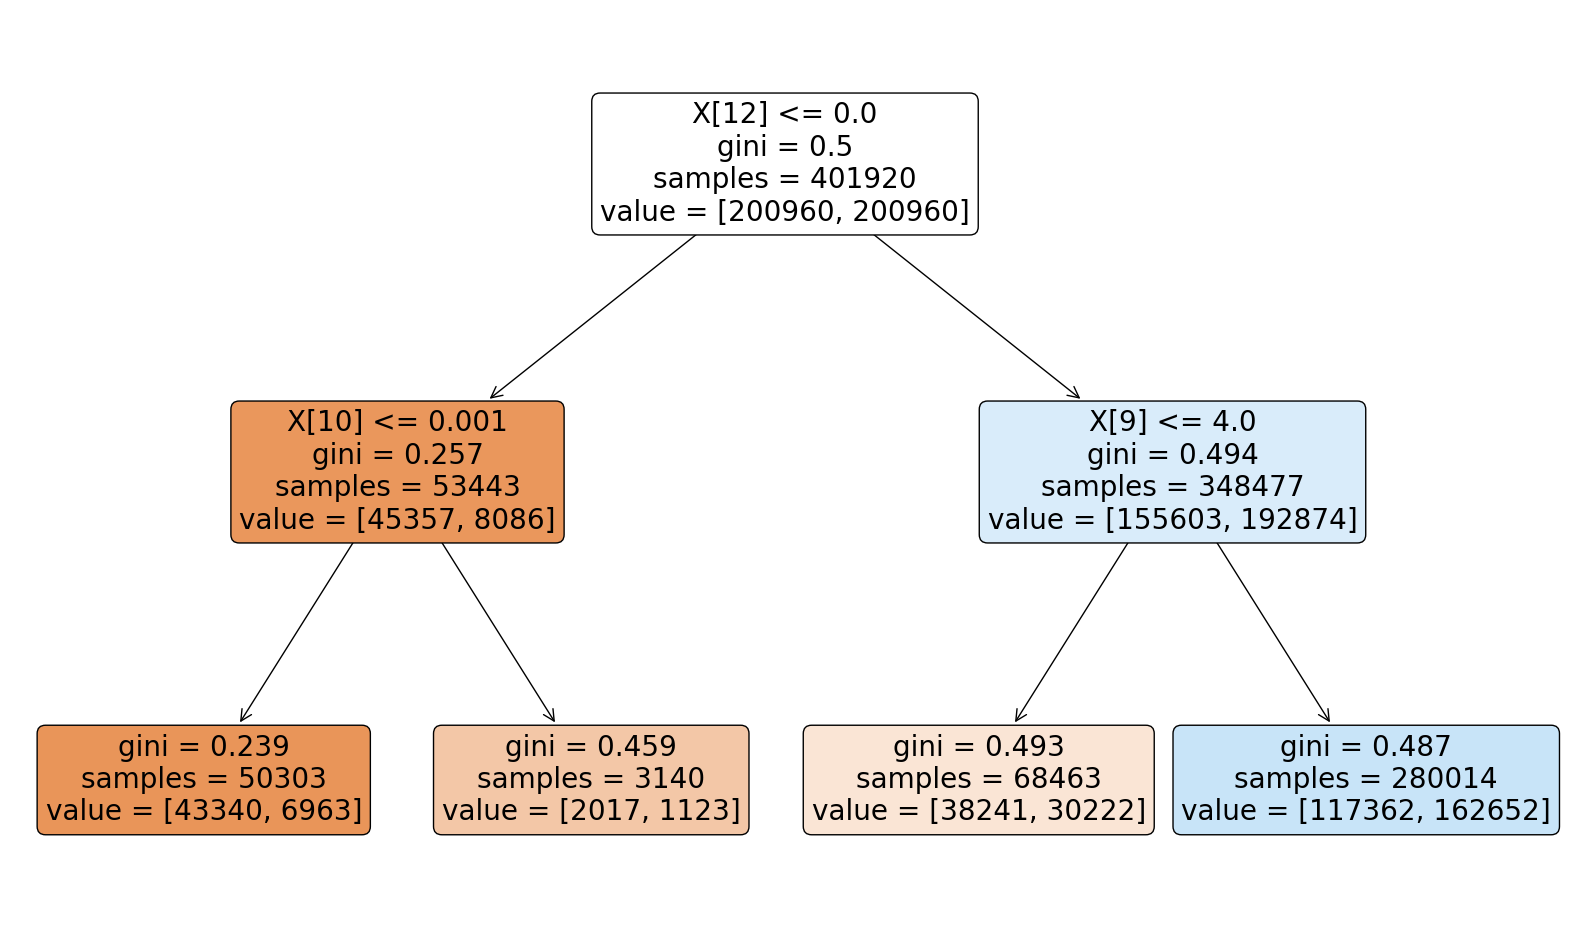

In [82]:
dtc=DecisionTreeClassifier(criterion="gini",max_depth=2,max_features="auto", min_samples_split=2,splitter='best').fit(xtrain_sm,ytrain_sm)
plt.figure(figsize=(20,12))
tree.plot_tree(dtc,rounded=True, filled=True)

Testing Accuracy : 44.09 %
Training Accuracy : 61.27 %
----------------------
Classification Report 
----------------------
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     66948
           1       0.72      0.21      0.32     28991

    accuracy                           0.74     95939
   macro avg       0.73      0.59      0.58     95939
weighted avg       0.73      0.74      0.68     95939



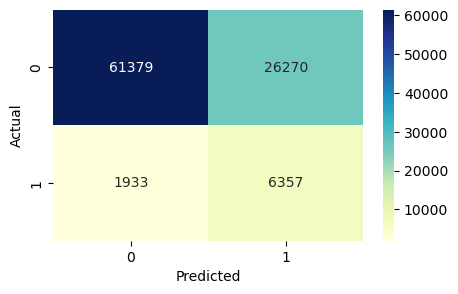

In [83]:
dtc_train = dtc.score(xtrain_sm,ytrain_sm)*100
dtc_test = dtc.score(xtest, ytest)*100
print('Testing Accuracy :',round(dtc_test,2),"%")
print('Training Accuracy :',round(dtc_train,2),"%")
print('----------------------')
print('Classification Report \n----------------------')
print(classification_report(dtc_pred, ytest))
plt.figure(figsize=(5,3))
data = confusion_matrix(ytest, dtc_pred)
dtc_con = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
sns.heatmap(lr_con, annot=True, fmt='g',cmap="YlGnBu")
f1 = metrics.f1_score(dtc_pred, ytest)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
auc = roc_auc_score(ytest,dtc_pred)
dtc_auc = round(auc*100,2)
dtc_auc

72.87

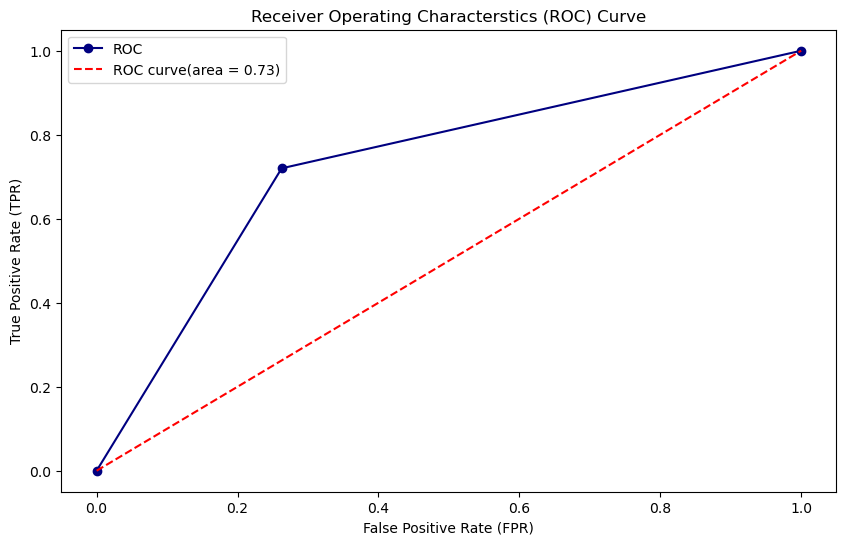

In [85]:
fpr, tpr, thresholds = roc_curve(ytest,dtc_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics (ROC) Curve')
plt.legend()
plt.show()

In [92]:
result('DecisionTreeClassifier', dtc_test, dtc_train, f1, dtc_auc)

# RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain_sm,ytrain_sm)
rfc_pred=rfc.predict(xtest)
pd.DataFrame(np.c_[ytest,rfc_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95934,0,0
95935,0,0
95936,0,0
95937,0,1


Testing Accuracy  : 86.62 %
Training Accuracy : 99.84 %
------------------------
 Classification Report 
------------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     86674
           1       0.28      0.25      0.27      9265

    accuracy                           0.87     95939
   macro avg       0.60      0.59      0.60     95939
weighted avg       0.86      0.87      0.86     95939



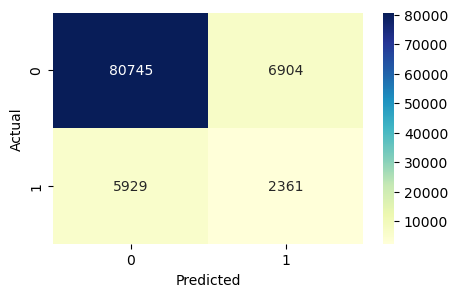

In [88]:
rfc_train = rfc.score(xtrain_sm,ytrain_sm)*100
rfc_test = rfc.score(xtest, ytest)*100
print('Testing Accuracy  :',round(rfc_test,2),"%")
print('Training Accuracy :',round(rfc_train,2),"%")
print('------------------------')
rfc_con = confusion_matrix(ytest,rfc_pred)
print(' Classification Report \n------------------------')
print(classification_report(rfc_pred, ytest))
plt.figure(figsize=(5,3))
data = confusion_matrix(ytest, rfc_pred)
rfc_con = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
sns.heatmap(rfc_con, annot=True, fmt='g', cmap='YlGnBu')
f1 = metrics.f1_score(rfc_pred, ytest)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [89]:
auc = roc_auc_score(ytest,rfc_pred)
rfc_auc = round(auc*100,2)
rfc_auc

60.3

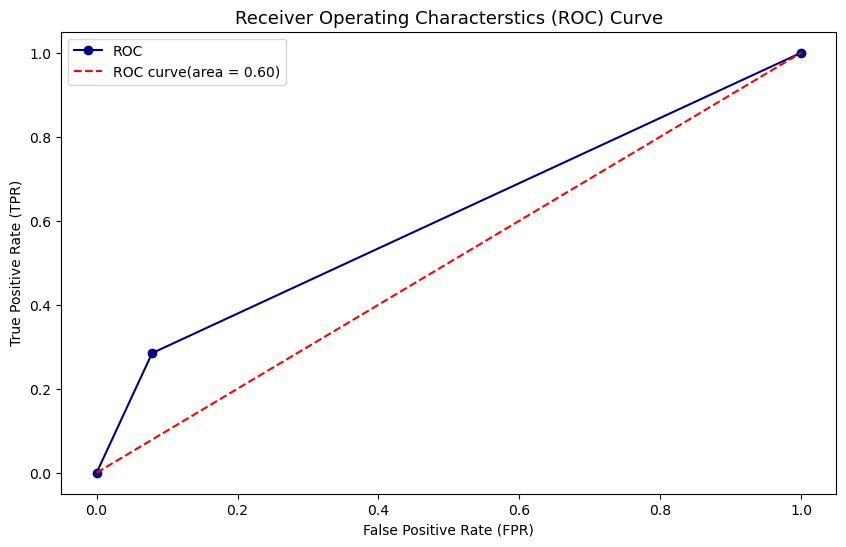

In [90]:
fpr, tpr, thresholds = roc_curve(ytest,rfc_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy', label='ROC',linestyle='-', marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics (ROC) Curve', size=13)
plt.legend()
plt.show()

In [91]:
result('Random Forest', rfc_test, rfc_train, f1, rfc_auc)

# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_sm,ytrain_sm)

KNeighborsClassifier(n_neighbors=3)

In [58]:
knn_pred=knn.predict(xtest)
pd.DataFrame(np.c_[ytest,knn_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95934,0,0
95935,0,0
95936,0,0
95937,0,0


Testing Accuracy  : 77.81 %
Training Accuracy : 93.71 %
------------------------
 Classification Report 
------------------------
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     74765
           1       0.49      0.19      0.28     21174

    accuracy                           0.78     95939
   macro avg       0.65      0.57      0.57     95939
weighted avg       0.74      0.78      0.74     95939



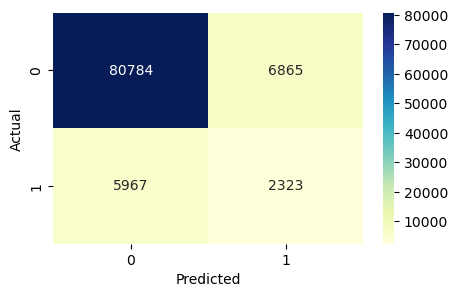

In [59]:
knn_train = knn.score(xtrain_sm, ytrain_sm)*100
knn_test = knn.score(xtest, ytest)*100
print('Testing Accuracy  :',round(knn_test,2),"%")
print('Training Accuracy :',round(knn_train,2),"%")
print('------------------------')
knn_con = confusion_matrix(ytest,knn_pred)
print(' Classification Report \n------------------------')
print(classification_report(knn_pred, ytest))
plt.figure(figsize=(5,3))
data = confusion_matrix(ytest, knn_pred)
knn_con = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
sns.heatmap(rfc_con, annot=True, fmt='g', cmap='YlGnBu')
f1 = metrics.f1_score(knn_pred, ytest)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
auc = roc_auc_score(ytest,knn_pred)
knn_auc = round(auc*100,2)
knn_auc

64.91

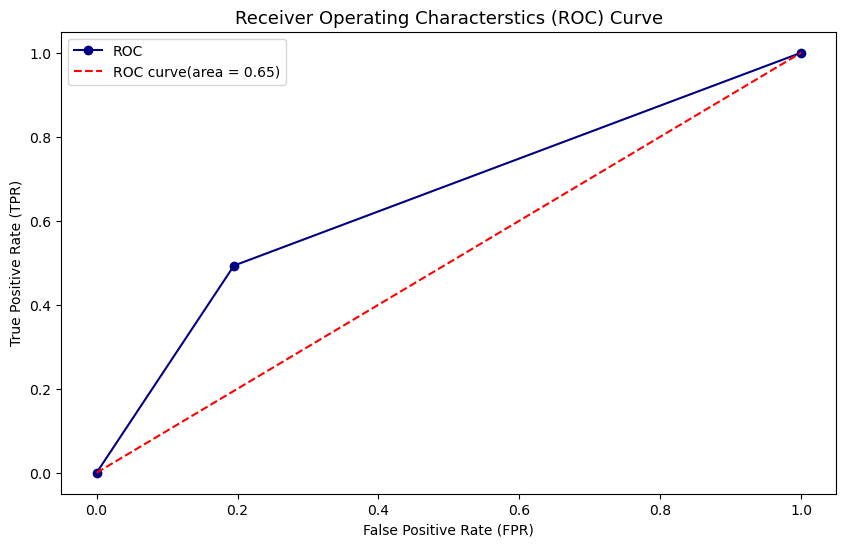

In [61]:
fpr, tpr, thresholds = roc_curve(ytest,knn_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy', label='ROC',linestyle='-', marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics (ROC) Curve', size=13)
plt.legend()
plt.show()

In [62]:
result('KNN', knn_test, knn_train, f1, knn_auc)

# Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain_sm, ytrain_sm)
nb_pred = nb.predict(xtest)
pd.DataFrame(np.c_[ytest,nb_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
95934,0,0
95935,0,0
95936,0,0
95937,0,1


Testing Accuracy  : 77.81 %
Training Accuracy : 93.71 %
------------------------
 Classification Report 
------------------------
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     74765
           1       0.49      0.19      0.28     21174

    accuracy                           0.78     95939
   macro avg       0.65      0.57      0.57     95939
weighted avg       0.74      0.78      0.74     95939



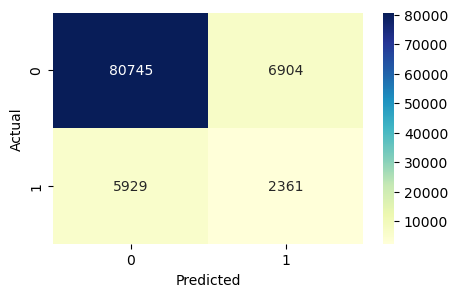

In [138]:
nb_train = nb.score(xtrain_sm, ytrain_sm)*100
nb_test = nb.score(xtest, ytest)*100
print('Testing Accuracy  :',round(knn_test,2),"%")
print('Training Accuracy :',round(knn_train,2),"%")
print('------------------------')
nb_con = confusion_matrix(ytest,nb_pred)
print(' Classification Report \n------------------------')
print(classification_report(knn_pred, ytest))
plt.figure(figsize=(5,3))
data = confusion_matrix(ytest, knn_pred)
nb_con = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
sns.heatmap(rfc_con, annot=True, fmt='g', cmap='YlGnBu')
f1 = metrics.f1_score(knn_pred, ytest)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [140]:
auc = roc_auc_score(ytest,nb_pred)
nb_auc = round(auc*100,2)
nb_auc

71.31

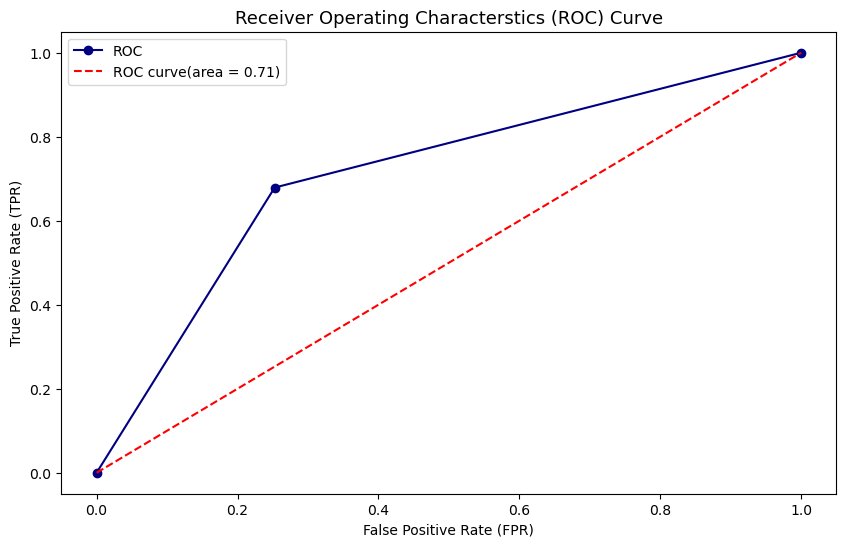

In [146]:
fpr, tpr, thresholds = roc_curve(ytest,nb_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy', label='ROC',linestyle='-', marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics (ROC) Curve', size=13)
plt.legend()
plt.show()

In [147]:
result('Naive Bayes', knn_test, knn_train, f1, knn_auc)

# Models Comparison & Evaluation¶


In [149]:
results = pd.DataFrame({ 'Models': MODEL,
                         'Testing Accuracy': TEST,
                         'Training Accuracy': TRAIN,
                         'F1_Score': F1_SCORE,
                         'AUC_Score': AUC})
results

,Models,Testing Accuracy,Training Accuracy,F1_Score,AUC_Score
0,Random Forest,86.62,99.84,26.58,60.09
1,KNN,77.81,93.71,27.75,64.91
2,Random Forest,86.62,99.84,31.07,60.09
3,Logistic Regression,70.60,74.60,31.07,73.36
4,DecisionTreeClassifier,44.09,61.27,32.02,72.87
5,Random Forest,86.62,99.84,26.90,60.30
6,DecisionTreeClassifier,44.09,61.27,26.90,72.87
7,nb,77.81,93.71,27.75,64.91
8,Naive Bayes,77.81,93.71,27.75,64.91
9,Naive Bayes,77.81,93.71,27.75,64.91


# K-fold cross validation

In [151]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(knn,xtrain_sm,ytrain_sm, cv=10)

In [152]:
cv_score #KNN score

array([0.88010052, 0.88149383, 0.88112062, 0.8808967 , 0.88020004,
       0.87975219, 0.87965267, 0.8778115 , 0.88186704, 0.88343451])

In [153]:
cv_score.mean()

0.8806329617834395

In [154]:
cv_score=cross_val_score(rfc,xtrain_sm,ytrain_sm, cv=10)

In [155]:
cv_score #Random forest score

array([0.78463376, 0.95081111, 0.95153264, 0.95078623, 0.95105991,
       0.95006469, 0.9532494 , 0.94919387, 0.95113455, 0.95163217])

In [156]:
cv_score.mean()

0.9344098328025477

In [157]:
cv_score=cross_val_score(lr,xtrain_sm,ytrain_sm, cv=10)

In [158]:
cv_score #Linear Regression

array([0.73857982, 0.75064689, 0.74524781, 0.74766123, 0.74370521,
       0.74686505, 0.74517317, 0.74315784, 0.74693969, 0.74773587])

In [159]:
cv_score.mean()

0.7455712579617835

In [160]:
cv_score=cross_val_score(nb,xtrain_sm,ytrain_sm, cv=10)

In [161]:
cv_score# Naive Bayes

array([0.72295482, 0.70830016, 0.70680732, 0.70892217, 0.70638436,
       0.70964371, 0.70742934, 0.70583698, 0.70951931, 0.71039013])

In [162]:
cv_score.mean()

0.7096188296178344